1. 샘플 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택
2. 각 샘플을 가장 가까운 센트로이드에 할당
3. 할당된 샘플들의 중심으로 센트로이드 이동
4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 2-3회 반복

In [2]:
from sklearn.datasets import make_blobs
# 가상의 샘플 데이터 생성
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state=0)

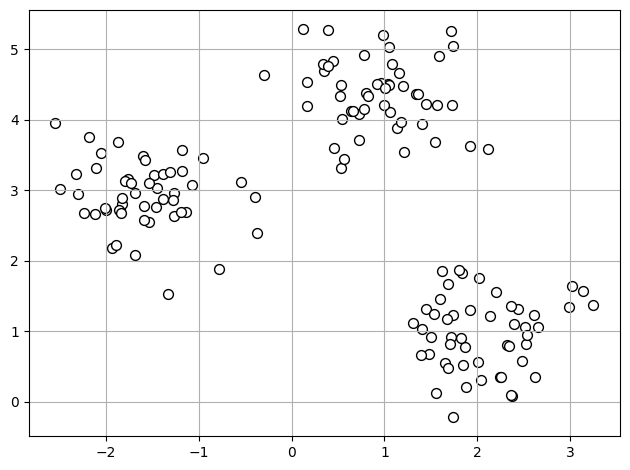

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0],
            X[:, 1],
            c= 'white',
            marker='o',
            edgecolor = 'black',
            s = 50)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init ='random',
            n_init = 10,          # 초기화를 몇번 진행?
            max_iter = 300,       # 알고리즘을 최대 몇번 반복?
            tol = 1e-04,          # 알고리즘이 수용되었다고 생각되는 오차값의 기준/ 오차 한계값
            random_state=0)
y_km = km.fit_predict(X)

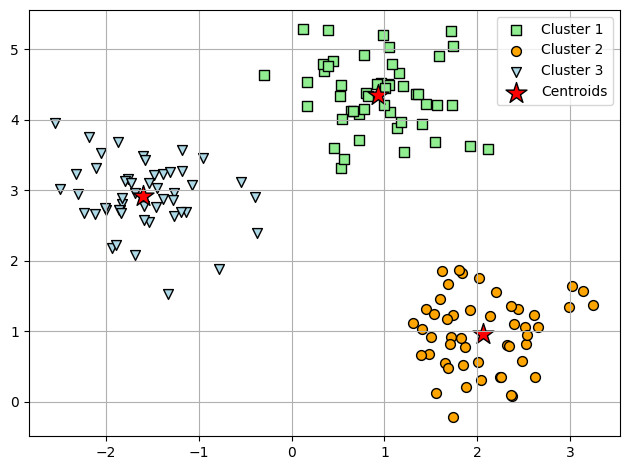

In [5]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, c='red',
            marker='*', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

초기 클러스터 중심을 잘 할당하여 군집결과의 품질을 크게 향항시키는 K-means++도 존재함!